# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [4]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import panel as pn
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

pn.extension()

%matplotlib inline

In [5]:
# Read the Mapbox API key
load_dotenv()

mapbox_token = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(mapbox_token)
print (mapbox_token)

pk.eyJ1IjoiY29ybi03NSIsImEiOiJja2dxcTk5YXkweHZ1MnlvODAyaW9ydzA0In0.8jwqtC1xxbGFxHKEHqeNoQ


## Load Data

In [6]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
data = pd.read_csv(file_path, index_col="year")
data.head(10)
housing_units = data["housing_units"].groupby(data.index).mean()

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

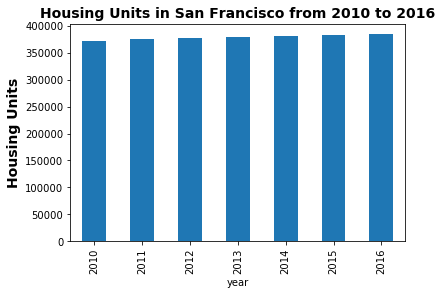

In [7]:
# Calculate the mean number of housing units per year (hint: use groupby) 
#print(data["housing_units"])
fig_housing_unit = plt.figure()
plt_housing_unit = housing_units.plot.bar()

#set_ylabel
plt_housing_unit.set_ylabel("Housing Units", fontsize=14, fontweight="bold")

#set_title
plt_housing_unit.set_title ("Housing Units in San Francisco from 2010 to 2016", fontsize=14, fontweight="bold")

plt.show()
plt.close(fig_housing_unit)

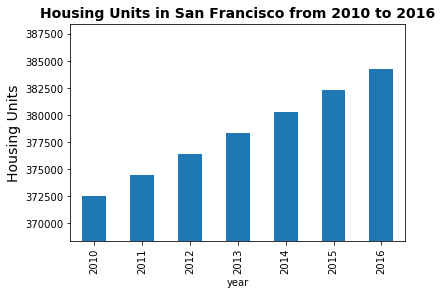

In [8]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max value
#print(data["housing_units"])
#housing_units.plot.bar(title="Housing Units in SanFran from 2010 to 2016",figsize=(6,4))
 
fig_housing_unit = plt.figure()
plt_housing_unit = housing_units.plot.bar()

#set_xlabel

#set_ylabel
plt_housing_unit.set_ylabel("Housing Units", fontsize=14)
#set_title
plt_housing_unit.set_title("Housing Units in San Francisco from 2010 to 2016", fontsize=14, fontweight="bold")

housing_min = min(housing_units)
housing_max = max(housing_units)
housing_std = housing_units.std()

#set_ylim
plt_housing_unit.set_ylim(housing_min - housing_std,housing_max + housing_std)

plt.show()
plt.close(fig_housing_unit)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [10]:
# Calculate the average gross rent and average sale price per square foot
average_cost = data[["sale_price_sqr_foot","gross_rent"]].groupby([data.index]).mean()
average_cost

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


AttributeError: 'Series' object has no attribute 'set_ylabel'

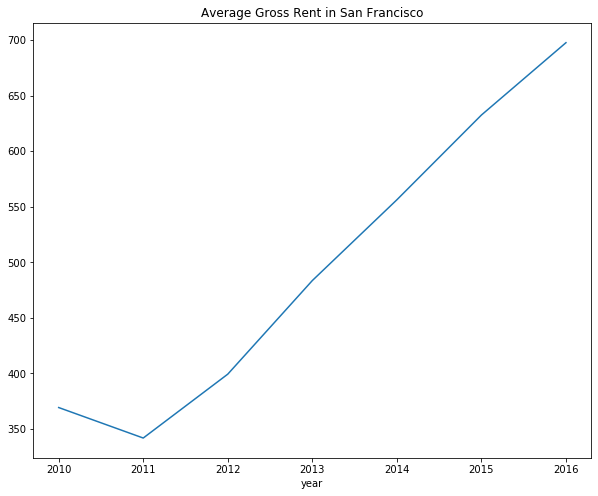

In [14]:
# Plot the Average Gross Rent per Year as a Line Chart 
#average_rent_sqr_foot.plot.line(title="Average Goss Rent per Year",figsize=(10,8))
average_price_per_sqr_foot = data["sale_price_sqr_foot"].groupby([data.index]).mean()
average_price_per_sqr_foot.plot(title="Average Gross Rent in San Francisco",figsize=(10,8))

#average_price_per_sqr_foot = plt.figure()
#average_price_per_sqr_foot = housing_units.plot.line()

#set_xlabel

#set_ylabel
average_price_per_sqr_foot.set_ylabel("Average Gross Rent in San Francisco", fontsize=14)
#set_title
average_price_per_sqr_foot.set_title("Average Gross Rent in San Francisco", fontsize=14, fontweight="bold")

housing_min = min(housing_units)
housing_max = max(housing_units)
housing_std = housing_units.std()

#set_ylim
plt_housing_unit.set_ylim(housing_min - housing_std,housing_max + housing_std)

plt.show()
plt.close(fig_housing_unit)

#Please using/ref the housing plot to do this one.

### Average Sales Price per Year

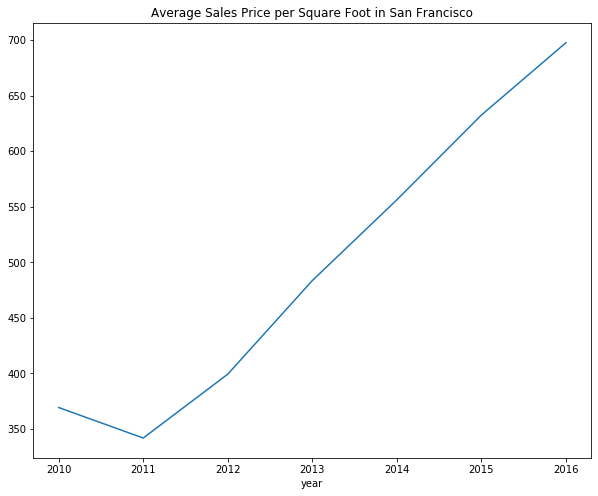

In [15]:
# Plot the Average Sales Price per Year as a line chart
average_price_per_sqr_foot = data["sale_price_sqr_foot"].groupby([data.index]).mean()
average_price_per_sqr_foot.plot(title="Average Sales Price per Square Foot in San Francisco",figsize=(10,8))

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [16]:
# Group by year and neighborhood and then create a new dataframe of the mean values
df_cost_avg_neighbor = data.groupby([data.index, "neighborhood"]).mean()
#sf_sales = sf_data_new["sale_price_sqr_foot"]
#sf_sales_df = pd.DataFrame(sf_sales).reset_index()
df_cost_avg_neighbor.reset_index(inplace=True)
df_cost_avg_neighbor.head(10)

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
5,2010,Central Sunset,418.172493,372560,1239
6,2010,Corona Heights,369.359338,372560,1239
7,2010,Cow Hollow,569.379968,372560,1239
8,2010,Croker Amazon,165.645730,372560,1239
9,2010,Diamond Heights,456.930822,372560,1239


In [19]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
df_cost_avg_neighbor.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel="Year",
    ylabel="Avg. cost",
    groupby="neighborhood",
)

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [20]:
# Getting the data from the top 10 expensive neighborhoods
#groupby_neighborhood = sfo_data.groupby("neighborhood", "sale_price_sqr_foot")
#mean_price_units = groupby_neighborhood["sale_price_sqr_foot"].mean()
top_10_most_expensive = data.sort_values(by='sale_price_sqr_foot', ascending=False).head(10)
#top_10_most_expensive = top_10_most_expensive.reset_index()
top_10_most_expensive

#top_10_most_expensive.hvplot.bar(rot=45, title='Top 10 Most Expensive')

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2015,Union Square District,2258.702832,382295,3739
2016,Presidio Heights,1465.968586,384242,4390
2016,Merced Heights,1416.666667,384242,4390
2013,Union Square District,1290.472107,378401,2971
2014,Miraloma Park,1267.766203,380348,3528
2016,Parnassus/Ashbury Heights,1207.997485,384242,4390
2016,Outer Richmond,1196.645437,384242,4390
2015,Marina,1132.837361,382295,3739
2014,South of Market,1119.838877,380348,3528


In [21]:
avg_value_per_neighborhood = data.groupby([data["neighborhood"]]).mean()
#avg_value_per_neighborhood = avg_value_per_neighborhood.reset_index()
avg_value_per_neighborhood = avg_value_per_neighborhood.sort_values(by="sale_price_sqr_foot", ascending=False).reset_index()

avg_value_per_neighborhood

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Union Square District,903.993258,377427.50,2555.166667
1,Merced Heights,788.844818,380348.00,3414.000000
2,Miraloma Park,779.810842,375967.25,2155.250000
3,Pacific Heights,689.555817,378401.00,2817.285714
4,Westwood Park,687.087575,382295.00,3959.000000
...,...,...,...,...
68,Visitacion Valley,301.466180,381321.50,3657.000000
69,Outer Mission,242.370952,379374.50,2995.750000
70,Bayview,204.588623,376454.00,2318.400000
71,Hunters Point,170.624920,377427.50,2489.000000


In [22]:
# Plotting the data from the top 10 expensive neighborhoods
top_10_most_expensive.hvplot.bar(
    x="neighborhood", 
    y="sale_price_sqr_foot", 
    title="Top 10 Most Expensive Neighborhoods in San Francisco", 
    height=400,
    rot=46)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [ ]:
#Create a Parallel Coordinates Plot
#avg_value_per_neighborhood = data['neighborhood'].groupby([data.index])
#print(avg_value_per_neighborhood)


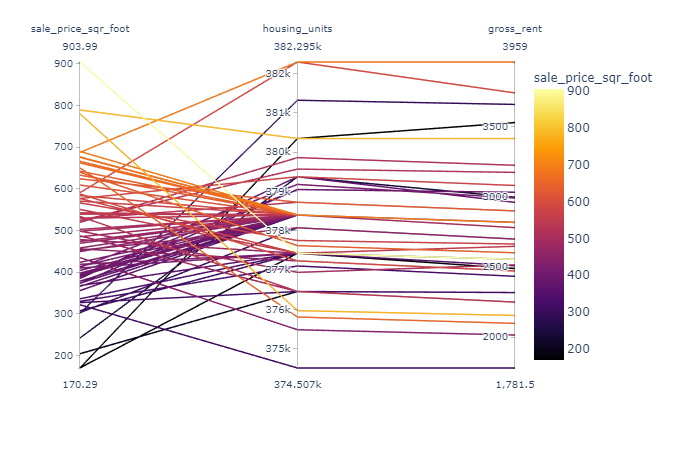

In [24]:
#avg_value_per_neighborhood.plot(title="Parallel Coordinates in San Francisco",figsize=(10,8))
fig = px.parallel_coordinates(
    avg_value_per_neighborhood,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
)
fig.show()
#print(avg_value_per_neighborhood)

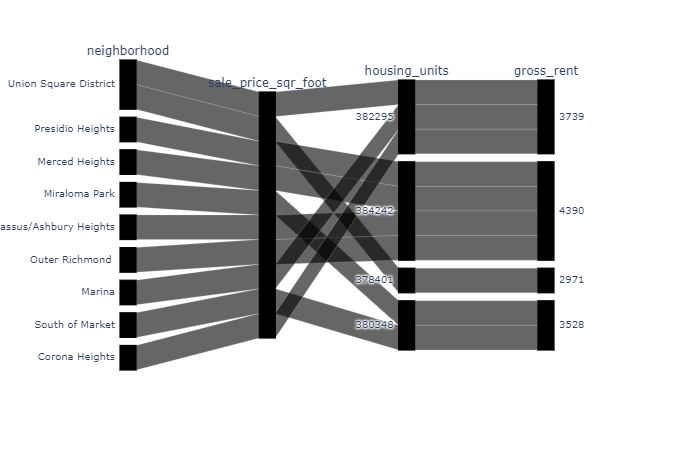

In [29]:
# Parallel Categories Plot
#average_price_per_sqr_foot = data["sale_price_sqr_foot"].groupby([data.index]).mean()
#average_price_per_sqr_foot.plot(title="Average Sales Price per Square Foot in San Francisco",figsize=(10,8))
px.parallel_categories(top_10_most_expensive, color="sale_price_sqr_foot", 
                      color_continuous_scale=px.colors.sequential.Inferno
                       )



- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [30]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
data_new = pd.read_csv(file_path, index_col="Neighborhood")
data_new.head(10)

#file_path = Path("Data/sfo_neighborhoods_census_data.csv")
#sfo_data = pd.read_csv(file_path, index_col="year")
#sfo_data.head()

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
Buena Vista Park,37.768160,-122.439330
Central Richmond,37.777890,-122.445170
Central Sunset,37.749610,-122.489990
Clarendon Heights,37.753310,-122.447030


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [31]:
# Join the average values with the neighborhood locations
avg_value_location = pd.concat([data_new, avg_value_per_neighborhood], axis="columns", join="inner")
avg_value_location.head()

,Lat,Lon,neighborhood,sale_price_sqr_foot,housing_units,gross_rent


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

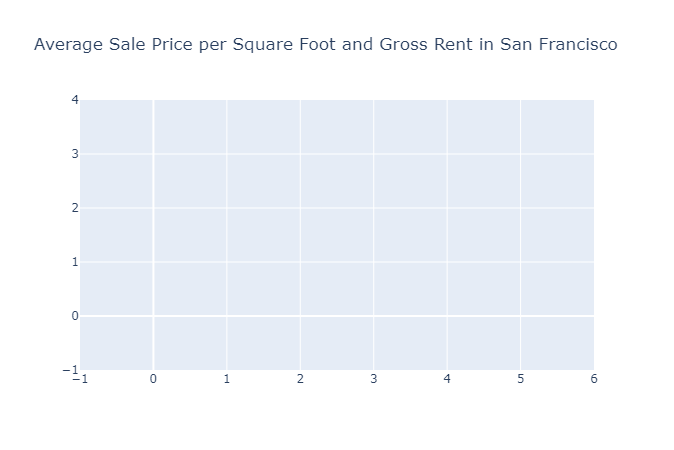

In [45]:
# Create a scatter mapbox to analyze neighborhood info
px.scatter_mapbox(
    avg_value_location,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    title="Average Sale Price per Square Foot and Gross Rent in San Francisco"
)